In [2]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import sys
sys.path.append('../models/stylegan2')
import dnnlib
import dnnlib.tflib as tflib
from run_generator import generate_images
from training import misc
import projector
import pretrained_networks
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
from os.path import join as oj
import os
import pandas as pd
import pickle as pkl
import gan_helper
import sklearn.model_selection
import torch
import models
import util
import skimage.transform

GAN = gan_helper.Generator() # initializes gan
print('Done!')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Done!


# synthetic images

In [9]:
N_IMS = 4
np.random.seed(13)
z = np.random.randn(N_IMS * 512).reshape((N_IMS, 512))
ims_synth = GAN.gen(z)

In [19]:
# latents, ims_proj_synth = GAN.project(ims_synth, num_steps=25,
#                                       image_prefix='synth')
ims_proj_synth_list = []
for i in range(len(ims_synth)):
    latents, ims_proj_synth = GAN.project(ims_synth[i: i+1], num_steps=50,
                                          image_prefix=f'synth{i}',
                                          num_snapshots=3, lr=3e-2)
    ims_proj_synth_list.append(ims_proj_synth)

writing to projections/synth0
writing to projections/synth1 
writing to projections/synth2 
writing to projections/synth3 


In [ ]:
util.plot_row(ims_synth, suptitle='synthetic images')
util.plot_row([ims[-2] for ims in ims_proj_synth_list],
               suptitle='synthetic reconstructions')
util.plot_row([ims[-1] for ims in ims_proj_synth_list],
               suptitle='synthetic reconstructions')

# real images

In [ ]:
def read_and_process_im(fname):
    '''Read square from middle and then reshape to 1024 x 1024
    '''
    im = np.array(PIL.Image.open(oj(REAL_IMAGES_DIR, fname)))
    print(im.shape)
    
    # make square
    dim = min(im.shape[0], im.shape[1])
    im = im[:dim, :dim]
    im = skimage.transform.resize(im, output_shape=(1024, 1024, 3))
    return im

REAL_IMAGES_DIR = 'images_misc'
ims_real = np.array([read_and_process_im(fname)
            for fname in os.listdir(REAL_IMAGES_DIR)
            if '.jpg' in fname])

In [169]:
ims_proj_real_list = []
for i in range(len(ims_real)):
    latents, ims_proj_synth = GAN.project(ims_real[i: i+1], num_steps=40,
                                          image_prefix=f'real{i}', num_snapshots=1)
    ims_proj_real_list.append(ims_proj_synth)

writing to projections/real0
writing to projections/real1  
writing to projections/real2  
writing to projections/real3  


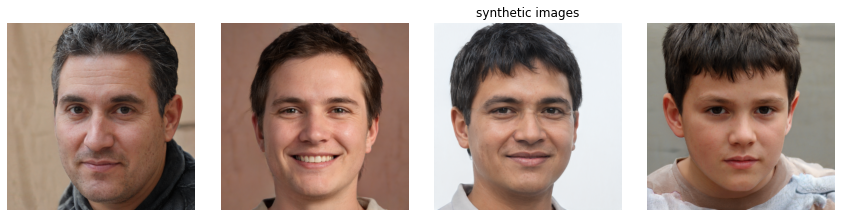

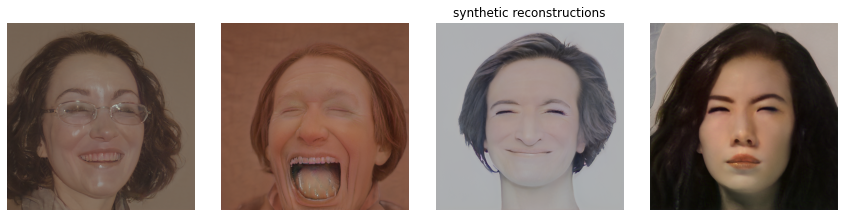

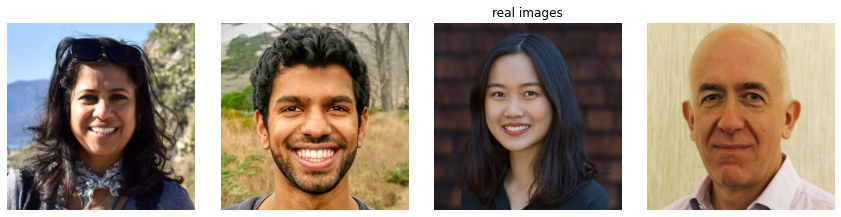

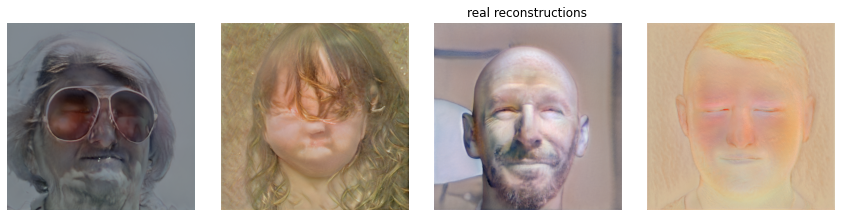

In [170]:

util.plot_row(ims_real, suptitle='real images')
util.plot_row(ims_proj_real_list, suptitle='real reconstructions')